In [4]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,auc
from matplotlib import pyplot as plt
import time 

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/Users/mahimasinghdeo/Downloads/reviews.csv',delimiter = '|')

In [6]:
df['label'][df['label']=="positive"]=1
df['label'][df['label']=="negative"]=0

In [7]:
test_df = df[df.index % 5 == 4]
test_df = test_df.reset_index(drop = True)

In [8]:
train_df = df[df.index % 5 !=4]
train_df = train_df.reset_index(drop = True)

In [9]:
train_feature = np.array(train_df['text'])
train_label = np.array(train_df['label'])
train_label = train_label.astype('int')

In [10]:
test_feature = np.array(test_df['text'])
test_label = np.array(test_df['label'])
test_label = test_label.astype('int')

In [11]:
t0 = time.clock()

In [12]:
 pipeline = Pipeline([
     ('vectorizer',TfidfVectorizer()),
         ('classifer',DecisionTreeClassifier()) 
])

In [13]:
pipeline.fit(train_feature,train_label)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [14]:
joblib.dump(pipeline,'DecisionTree.sav')

['DecisionTree.sav']

In [15]:
pred = pipeline.predict(test_feature)

# Accuracy

In [16]:
accuracy = accuracy_score(test_label,pred)
accuracy

0.75986097740882896

# Precision and Recall

In [17]:
print(classification_report(test_label,pred,target_names=['negative','positive']))

             precision    recall  f1-score   support

   negative       0.76      0.76      0.76     39974
   positive       0.76      0.76      0.76     40013

avg / total       0.76      0.76      0.76     79987



# ROC Curve

In [18]:
#calculate ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label,pred)

In [19]:
#calculate area under ROC curve
area_under_roc = roc_auc_score(test_label,pred)
area_under_roc

0.75986029855501847

In [20]:
#calculate area under a curve given x coordinates and y coordinates
auc_ = auc(false_positive_rate, true_positive_rate)

In [21]:
#function to plot ROC AUC
def plot_auc(false_positive_rate, true_positive_rate,auc_):
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% auc_)
    plt.legend(loc ='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

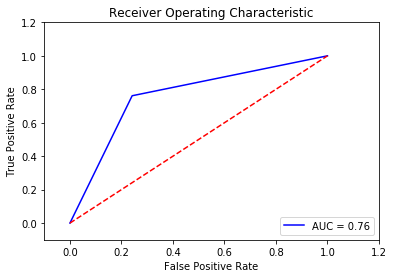

In [22]:
#call function to plot ROC AUC
plot_auc(false_positive_rate, true_positive_rate,auc_)

In [23]:
print(time.clock() - t0)

1912.259157
